1.数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

In [48]:
import pandas as pd
file_path ='C:\\Users\\任雪宁\\Desktop\\bike (2).csv'
df = pd.read_csv(file_path)
print(df.head())

   id  city  hour  is_workday  weather  temp_air  temp_body  wind   y
0   1     0    22           1        2       3.0        0.7     0  15
1   2     0    10           1        1      21.0       24.9     3  48
2   3     0     0           1        1      25.3       27.4     0  21
3   4     0     7           0        1      15.7       16.2     0  11
4   5     1    10           1        1      21.1       25.0     2  39


2.id属性对构建回归预测模型没有帮助，请剔除掉该列。


In [50]:
import pandas as pd
file_path ='C:\\Users\\任雪宁\\Desktop\\bike (2).csv'
df_dropped = df.drop(columns=['id'])
print(df_dropped.head())
df_dropped.to_csv(file_path, index=False) 

   city  hour  is_workday  weather  temp_air  temp_body  wind   y
0     0    22           1        2       3.0        0.7     0  15
1     0    10           1        1      21.0       24.9     3  48
2     0     0           1        1      25.3       27.4     0  21
3     0     7           0        1      15.7       16.2     0  11
4     1    10           1        1      21.1       25.0     2  39


3.我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

In [52]:
import pandas as pd
file_path = 'C:\\Users\\任雪宁\\Desktop\\bike (2).csv'
df = pd.read_csv(file_path)
shanghai_data = df[df['city'] == 1]
shanghai_data_dropped = shanghai_data.drop(columns=['city'])
print(shanghai_data_dropped.head())
shanghai_data_dropped.to_csv(file_path, index=False)

    hour  is_workday  weather  temp_air  temp_body  wind   y
4     10           1        1      21.1       25.0     2  39
5      0           1        1      20.4       18.2     0  12
9      4           1        3      17.4       18.0     3   2
10     0           1        1      14.9       15.3     2   6
11     8           0        1      25.0       28.1     0  25


4.为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

In [54]:
import pandas as pd
file_path = 'C:\\Users\\任雪宁\\Desktop\\bike (2).csv'
df = pd.read_csv(file_path)
def convert_hour(hour):
    if 6 <= hour <= 18:
        return 1
    else:
        return 0
df['hour'] = df['hour'].apply(convert_hour)
print(df.head())
df.to_csv(file_path, index=False)

   hour  is_workday  weather  temp_air  temp_body  wind   y
0     1           1        1      21.1       25.0     2  39
1     0           1        1      20.4       18.2     0  12
2     0           1        3      17.4       18.0     3   2
3     0           1        1      14.9       15.3     2   6
4     1           0        1      25.0       28.1     0  25


5.y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。


In [56]:
import pandas as pd
import numpy as np
file_path ='C:\\Users\\任雪宁\\Desktop\\bike (2).csv'
df = pd.read_csv(file_path)
y = df['y'].to_numpy().reshape(-1, 1) 
df_without_y = df.drop(columns=['y'])
print(df_without_y.head())
df_without_y.to_csv(file_path, index=False)

   hour  is_workday  weather  temp_air  temp_body  wind
0     1           1        1      21.1       25.0     2
1     0           1        1      20.4       18.2     0
2     0           1        3      17.4       18.0     3
3     0           1        1      14.9       15.3     2
4     1           0        1      25.0       28.1     0


6.请将DataFrame对象转换为Numpy数组，方便后续操作。

In [58]:
import pandas as pd
import numpy as np
X = df_without_y.to_numpy()
print(df_without_y.to_numpy())
df_without_y.to_csv(file_path, index=False)

[[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 ...
 [ 0.   1.   3.  13.7 14.1  2. ]
 [ 0.   0.   1.  22.3 22.2  0. ]
 [ 0.   0.   1.   9.6  9.7  0. ]]


7.请按照训练集与测试集8:2的比例将原始数据集划分。

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_y, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3998, 6)
y_train shape: (3998, 1)
X_test shape: (1000, 6)
y_test shape: (1000, 1)


8.请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()  
scaler_y = MinMaxScaler()  
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (3998, 6)
y_train_scaled shape: (3998, 1)
X_test_scaled shape: (1000, 6)
y_test shape: (1000, 1)


9.请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(df_without_y, y, test_size=0.2, random_state=42)
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients.flatten()}")  
print(f"Intercept: {intercept}")

Mean Squared Error (MSE): 996.5688433356042
R^2 Score: 0.37183953173606443
Coefficients: [ 33.14686071  -0.55446073 -15.38569688  26.87019273  55.03201295
   5.07876344]
Intercept: [-12.80682748]


10.利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。


Mean Squared Error (MSE): 996.5688433356042
R^2 Score: 0.37183953173606443


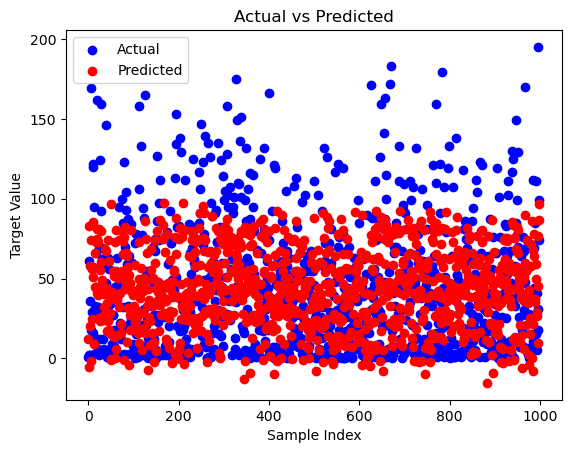

In [66]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

11.模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 31.56847863511329


K近邻（K-Nearest Neighbors，简称KNN）算法是一种基本的分类和回归方法，也是监督学习中最简单、直观的方法之一。

该算法基于一个简单的思想：如果一个样本在特征空间中的k个最近邻居中的大多数属于某个类别，则该样本也属于这个类。

利用鸢尾花数据集进行实验，鸢尾花数据集可以通过sklear库1.导入

加载数据，划分鸢尾花数据集，训练集比例0.2，制数据的散点图

In [72]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data 
y = iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.机种子42
以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图

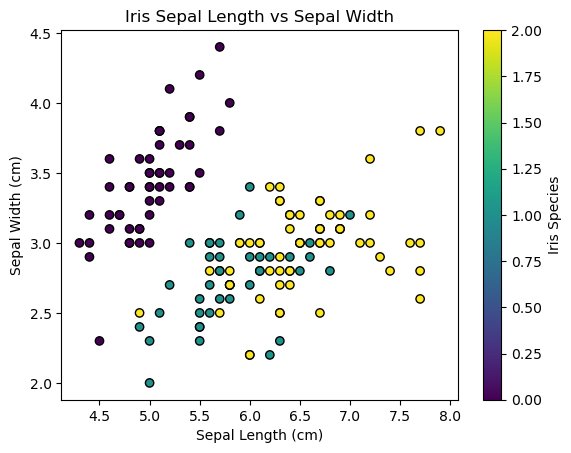

In [74]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
y = iris.target 
sepal_length = X[:, 0]
sepal_width = X[:, 1]
plt.scatter(sepal_length, sepal_width, c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Iris Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Iris Species')
plt.show()

3.对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2

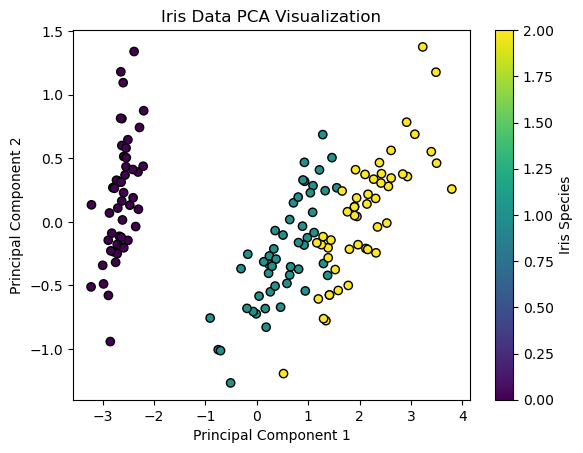

In [76]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data 
y = iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Iris Data PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Iris Species')
plt.show()

4.以K=3训练分类器

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

5.在测试集上进行测试，最后输出分类准确率

In [80]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
